# 5 Linear Systems

*Overview*

- [5.0 Introduction](#5.0-Introduction)
- [5.1 Definitions and Exmaples](#5.1 Definitions-and-Exmaples)
    - [Example 5.1.1](#Example-5.1.1)
    - [Stability Language](#Stability-Language)
- [5.2 Classification of Linear Systems](#5.2-Classification-of-Linear-Systems)
    - [Example 5.2.1](#Example-5.2.1)
    - [Example 5.2.2](#Example-5.2.2)
    - [Classification of Fixed Points](#Classification-of-Fixed-Points)
    - [Example 5.2.6](#Example-5.2.6)
    - [Example 5.2.7](#Example-5.2.7)
- [5.3 Love Affairs](#5.3-Love-Affairs)

---

In [1]:
# import
import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

print('numpy:\t\t%s\n' 
      'scipy:\t\t%s\n' 
      'pandas:\t\t%s\n'
      'matplotlib:\t%s\n' % 
      (np.__version__, 
       scipy.__version__, 
       pd.__version__, 
       matplotlib.__version__))

numpy:		1.13.3
scipy:		0.19.1
pandas:		0.22.0
matplotlib:	2.1.1



In [1]:
c = ['#1f77b4', 
     '#ff7f0e', 
     '#2ca02c', 
     '#d62728', 
     '#9467bd', 
     '#8c564b', 
     '#e377c2', 
     '#7f7f7f', 
     '#bcbd22', 
     '#17becf']

l = ['-', '--', '-.', ':']
m = ['o', 'x', 's']

"""
figname = ''
plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)
"""

"""
$$\begin{align*}
& \quad\quad (5.)
\end{align*}$$
"""

'\n$$\x08egin{align*}\n& \\quad\\quad (5.)\n\\end{align*}$$\n'

## 5.0 Introduction
---

## 5.1 Definitions and Exmaples
---

**two-dimensional lilnear system**

$$\begin{align*}
\dot{x} &= ax + by \\
\dot{y} &= cx + dy
\end{align*}$$

$$\mathbf{\dot{x}} = \mathbf{Ax}$$

where

$$\begin{align*}
\mathbf{A} = 
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
\quad \text{and} \quad
\mathbf{x} = 
\begin{pmatrix}
x \\
y
\end{pmatrix}
\end{align*}$$

### Example 5.1.1

**simple harmonic oscillator**

$$\begin{align*}
m\ddot{x} + kx = 0
& \quad\quad (5.1.1)
\end{align*}$$

- $m$: mass
- $k$: spring constant
- $x$: displacement of the mass drom equilibrium


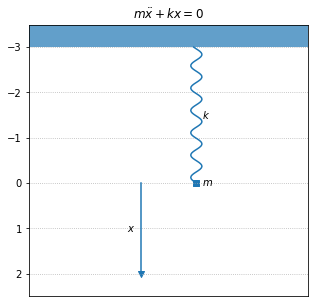

In [2]:
plt.figure(figsize=(5, 5))

# k
k = 3
plt.plot(np.sin(np.linspace(-k, 0, 100)*40/np.pi)*.1, np.linspace(-k, 0, 100), c=c[0], linestyle=l[0])
plt.text(0.1, -k/2, r'$k$', horizontalalignment='left', verticalalignment='center')

# m
plt.scatter(0, 0, c=c[0], marker=m[2])
plt.text(0.1, 0, r'$m$', horizontalalignment='left', verticalalignment='center')

# x
x = 2
plt.plot(np.array([-1, -1]), np.array([0, x]), c=c[0], linestyle=l[0])
plt.text(-1.1, x/2, r'$x$', horizontalalignment='right', verticalalignment='center')
plt.scatter(-1, x, c=c[0], marker='v')

plt.axhspan(-3.5, -3, facecolor=c[0], alpha=.7)

# plt.plot(np.array([0, -1.5]), np.array([0, 0]), c=c[0], linestyle=l[1])

plt.title(r'$m\ddot{x} + kx = 0$')
plt.xlim(-3, 2)
plt.ylim(2.5, -3.5)
plt.xticks([])
# plt.yticks([])
plt.grid(True, linestyle=l[3])

plt.show()

$$\begin{align*}
\dot{x} &= v
& \quad\quad (5.1.2a) \\
\dot{v} &= -\frac{k}{m} x
& \quad\quad (5.1.2b)
\end{align*}$$

(5.1.2a): def of velocity
(5.1.2b): (5.1.1) rewritten

Let $\omega^2 := \frac{k}{m}$

$$\begin{align*}
\dot{x} &= v 
& \quad\quad (5.1.3a) \\
\dot{v} &= -\omega^2 x
& \quad\quad (5.1.3b)
\end{align*}$$

$$\begin{pmatrix}\dot{x}\\ \dot{v}\end{pmatrix} = \begin{pmatrix}v\\ -\omega^2x\end{pmatrix}$$

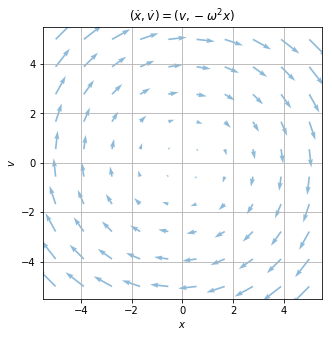

In [3]:
# constant
omega = 1

def x_dot(x, v):
    x_ = v
    return x_

def v_dot(x, v):
    v_ = - omega**2 * x
    return v_

def speed(x, v):
    s = np.sqrt(x_dot(x, v)**2 + v_dot(x, v)**2)
    return s

x, v = np.linspace(-5, 5, 10), np.linspace(-5, 5, 10)
x, v = np.meshgrid(x, v)

s = speed(x, v)
s = s / (np.max(s) - np.min(s))

plt.figure(figsize=(5, 5))

plt.quiver(x, v, x_dot(x, v), v_dot(x, v), color=c[0], alpha=.5)

plt.grid(True)
plt.title(r'$(\dot{x}, \dot{v}) = (v, -\omega^2x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')

plt.show()

# print(np.max(speed(x, v)))
# print(np.min(speed(x, v)))

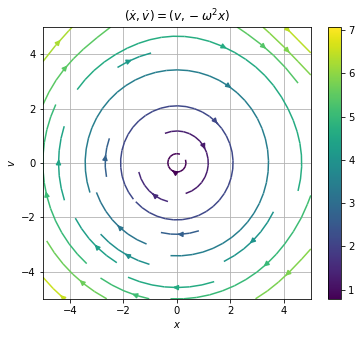

In [4]:
omega = 1

def x_dot(x, v):
    x_ = v
    return x_

def v_dot(x, v):
    v_ = - omega**2 * x
    return v_

def speed(x, v):
    s = np.sqrt(x_dot(x, v)**2 + v_dot(x, v)**2)
    return s

x, v = np.linspace(-5, 5, 10), np.linspace(-5, 5, 10)
x, v = np.meshgrid(x, v)

plt.figure(figsize=(6, 5))

plt.streamplot(x, v, x_dot(x,v), v_dot(x,v), 
               color=speed(x,v), cmap='viridis',
               density=.5)

plt.title(r'$(\dot{x}, \dot{v}) = (v, -\omega^2x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.grid(True)
plt.colorbar()

plt.savefig('img/fig_5_1_3.png', dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

plt.show()

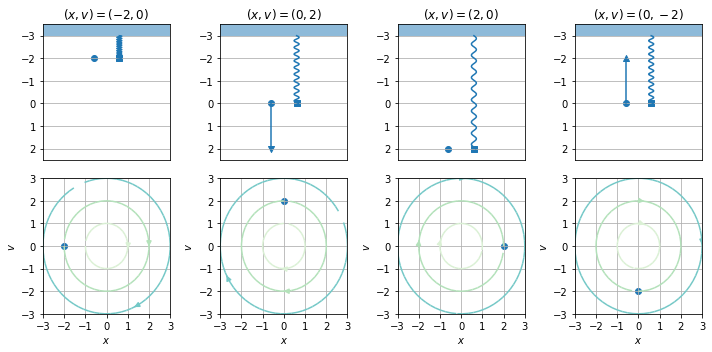

In [2]:
omega = 1
pi = np.pi

def x_dot(x, v):
    x_ = v
    return x_

def v_dot(x, v):
    v_ = - omega**2 * x
    return v_

def speed(x, v):
    s = np.sqrt(x_dot(x, v)**2 + v_dot(x, v)**2)
    return s

# xs = np.array([-2, 0, 2, 0])
# vs = np.array([0, 2, 0, -2])

xs = np.array([-2, 0, 2, 0])
vs = np.array([0, 2, 0, -2])

x_stream, v_stream = np.linspace(-3, 4, 10), np.linspace(-3, 4, 10)
x_stream, v_stream = np.meshgrid(x_stream, v_stream)

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(10, 5))

for i in range(4):
    x = xs[i]
    v = vs[i]
    
    axes[1, i].scatter(x, v, c=c[0], marker=m[0])
    #axes[1, i].plot(2*np.cos(np.linspace(-pi, pi, 100)), 2*np.sin(np.linspace(-pi, pi, 100)), c=c[0], linestyle=l[1], alpha=.5)
    axes[1, i].streamplot(x_stream, v_stream, x_dot(x_stream, v_stream), v_dot(x_stream, v_stream), 
                          color=speed(x_stream, v_stream), cmap='GnBu',
                          start_points=np.array([[x, v], [x/2, v/2], [x*3/2, v*3/2]]))
    
    axes[1, i].set_xlim(-3, 3)
    axes[1, i].set_ylim(-3, 3)
    axes[1, i].set(xlabel=r'$x$', ylabel=r'$v$')
    axes[1, i].set_xticks(np.arange(-3, 4, 1))
    axes[1, i].set_yticks(np.arange(-3, 4, 1))
    axes[1, i].grid(True)
    #axes[1, i].colorbar()
    
    axes[0, i].plot(np.sin(np.linspace(0, x+3, 100)*200/(x+3)/pi)*.1, np.linspace(-3, x, 100), c=c[0], linestyle=l[0])
    # m
    axes[0, i].scatter(0, x, c=c[0], marker=m[2])
    axes[0, i].plot(np.array([-1, -1]), np.array([x, x+v]), c=c[0], linestyle=l[0])
    axes[0, i].scatter(-1, x, c=c[0], marker='o')
    
    if v > 0:
        axes[0, i].scatter(-1, x+v, c=c[0], marker='v')
    elif v < 0:
        axes[0, i].scatter(-1, x+v, c=c[0], marker='^')
    
    axes[0, i].axhspan(-3.5, -3, facecolor=c[0], alpha=.5)
    axes[0, i].set(title=(r'$(x, v) = (%d, %d$)' % (x, v)))
    axes[0, i].set_xlim(-3, 2)
    axes[0, i].set_ylim(2.5, -3.5)
    axes[0, i].set_xticks([])
    axes[0, i].set_yticks(np.arange(-3, 3, 1))
    axes[0, i].grid(True)
        
plt.tight_layout()

# plt.savefig('img/fig_5_1_4.png', dpi=None, facecolor='w', edgecolor='w',
#             orientation='portrait', papertype=None, format='png',
#             transparent=False, bbox_inches=None, pad_inches=0.1,
#             frameon=None)

plt.show()

In [20]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

omega = 1
pi = np.pi

def x_dot(x, v):
    x_ = v
    return x_

def v_dot(x, v):
    v_ = - omega**2 * x
    return v_

def speed(x, v):
    s = np.sqrt(x_dot(x, v)**2 + v_dot(x, v)**2)
    return s

xs = np.array([-2, 0, 2, 0])
vs = np.array([0, 2, 0, -2])

x_stream, v_stream = np.linspace(-3, 4, 10), np.linspace(-3, 4, 10)
x_stream, v_stream = np.meshgrid(x_stream, v_stream)


def plot_spring(t, k):
    
    x = np.cos(t*(-pi)) * (k)
    v = np.sin(t*(-pi)) * (k)
    
    fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
    
    axes[1].scatter(x, v, c=c[0], marker=m[0])
    #axes[1].plot(2*np.cos(np.linspace(-pi, pi, 100)), 2*np.sin(np.linspace(-pi, pi, 100)), c=c[0], linestyle=l[1], alpha=.5)

    axes[1].streamplot(x_stream, v_stream, x_dot(x_stream, v_stream), v_dot(x_stream, v_stream), 
                       color=speed(x_stream, v_stream), cmap='GnBu', 
                       density=.5)
    
    axes[1].set_xlim(-3, 3)
    axes[1].set_ylim(-3, 3)
    axes[1].set(xlabel=r'$x$', ylabel=r'$v$')
    axes[1].set_xticks(np.arange(-3, 4, 1))
    axes[1].set_yticks(np.arange(-3, 4, 1))
    axes[1].grid(True)
    
    axes[0].plot(np.sin(np.linspace(0, x+3, 100)*200/(x+3)/pi)*.1-1, np.linspace(-3, x, 100), c=c[0], linestyle=l[0])
    # m
    axes[0].scatter(-1, x, c=c[0], marker=m[2])
    axes[0].text(-1.1, x, (r'$x = %.2f$' % x), horizontalalignment='right', verticalalignment='center')
    axes[0].plot(np.array([0, 0]), np.array([x, x+v]), c=c[0], linestyle=l[0])
    axes[0].text(.1, x+v/2, (r'$v = %.2f$' % v), horizontalalignment='left', verticalalignment='center')
    axes[0].scatter(0, x, c=c[0], marker='o')
    
    if v > 0:
        axes[0].scatter(0, x+v, c=c[0], marker='v')
    elif v < 0:
        axes[0].scatter(0, x+v, c=c[0], marker='^')
    
    axes[0].text(-1.1, x/2 - 1.5, (r'$k = %.2f$' % k), horizontalalignment='right', verticalalignment='center')
    
    axes[0].text(1.5, 3, (r'$t = %.2f$' % t), horizontalalignment='left', verticalalignment='bottom')
    axes[0].axhspan(-3.5, -3, facecolor=c[0], alpha=.5)
    axes[0].set(title=(r'$(x, v) = (%.2f, %.2f$)' % (x, v)))
    axes[0].set_xlim(-3, 2)
    axes[0].set_ylim(3.5, -3.5)
    axes[0].set_xticks([])
    axes[0].set_yticks(np.arange(-3, 4, 1))
    axes[0].grid(True)
    
    plt.tight_layout()
    plt.show()

# plot_spring(2, 0)

interactive_plot = interactive(plot_spring, t=(0, 4, 0.1), k=(0, 2, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

A Jupyter Widget

### Example 5.1.2

Solve the linear system $\dot{\mathbf{x}} = \mathbf{Ax}$, 
where $\mathbf{A} = \begin{pmatrix} a & 0 \\ 0 & -1 \end{pmatrix}$

*Solution*:

$$\begin{pmatrix}
\dot{x} \\ 
\dot{y}
\end{pmatrix}
= 
\begin{pmatrix}
a & 0 \\
0 & -1
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix}$$

$$\begin{align*}
x(t) &= x_0e^{at}
& \quad\quad (5.1.1a) \\
y(t) &= y_0e^{-t}
& \quad\quad (5.1.1b)
\end{align*}$$



$$\begin{align*}
& \quad\quad (5.1.)
\end{align*}$$

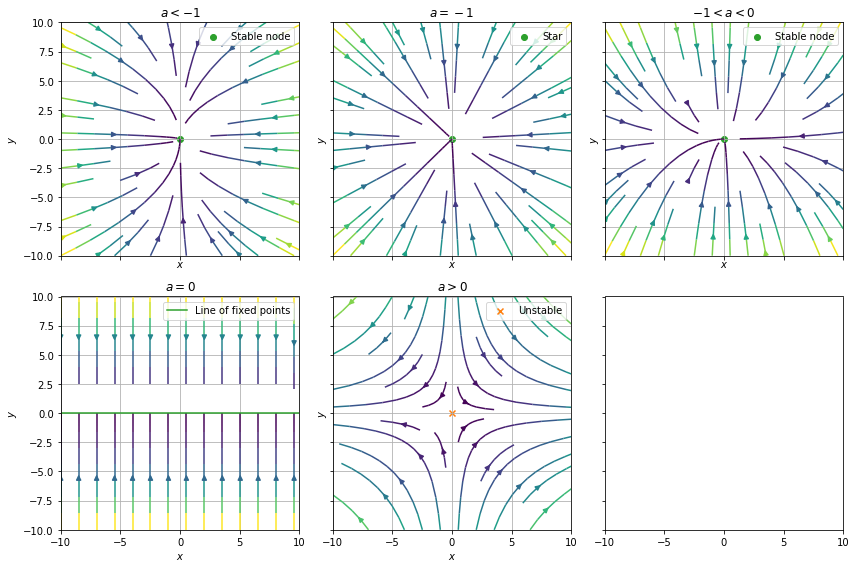

In [32]:
def x_dot(x, y, a):
    x_ = a*x
    return x_

def y_dot(x, y, a):
    y_ = - y
    return y_

# A = np.arange(-1.5, 1, .5)
A = np.array([-2, -1, -0.5, 0, 1])
# A = np.array([-3, -1, -1/3, 
#               -1/9, 0, 1/9, 
#               1/3, 1, 3])
# labels = np.array([r'$a = -3^{1}$', r'$a = -3^{0}$', r'$a = -3^{-1}$', 
#                    r'$a = -3^{-2}$', r'$a = 0$', r'$a = 3^{-2}$', 
#                    r'$a = 3^{-1}$', r'$a = 3^{0}$', r'$a = 3^{1}$'])
labels = np.array([r'$a<-1$', r'$a=-1$', r'$-1<a<0$', r'$a=0$', r'$a>0$'])

x, y = np.linspace(-10, 10, 20), np.linspace(-10, 10, 20)
x, y = np.meshgrid(x, y)

fig, axes = plt.subplots(ncols=3, nrows=2, sharex=True, sharey=True, figsize=(12, 8))

for ax, a, label in zip(axes.ravel(), A, labels):
    ax.streamplot(x, y, x_dot(x, y, a), y_dot(x, y, a), 
                  density=.5,
                  color=x_dot(x, y, a)**2+y_dot(x, y, a)**2, cmap='viridis')# color=c[0])
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set(xlabel=r'$x$', ylabel=r'$y$', title=label)
    ax.grid(True)
    
    if (a < -1) | (-1 < a < 0):
        ax.scatter(0, 0, c=c[2], marker=m[0], label='Stable node')
    elif a == -1:
        ax.scatter(0, 0, c=c[2], marker=m[0], label='Star')
    elif a == 0:
        ax.plot(np.linspace(-10, 10, 5), np.repeat(0, 5), c=c[2], linestyle=l[0], label='Line of fixed points')
    elif a > 0:
        ax.scatter(0, 0, c=c[1], marker=m[1], label='Unstable')
    
    ax.legend(loc='upper right')

plt.tight_layout()

plt.savefig('img/fig_5_1_5.png', dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

plt.show()

### Stability Language

**Attracting** fixed point

**Globally attracting**

**Liapunov stable**

**Neutrally stable**

## 5.2 Classification of Linear Systems
---

$$\begin{align*}
\mathbf{X}(t) = e^{\lambda t} \mathbf{v}
& \quad\quad (5.2.2)
\end{align*}$$

- $\mathbf{x} \ne \mathbf{o}$: some fixed vector
- $\lambda$: grawth rate

substitute into $\mathbf{\dot{x}} = \mathbf{Ax}$

$\lambda e^{\lambda t} \mathbf{v} = e^{\lambda t} \mathbf{Av}$

$$\begin{align*}
\mathbf{Av} = \lambda \mathbf{v}
& \quad\quad (5.2.3)
\end{align*}$$

if $\mathbf{x}$ is **eigenvector**, **eigenvalue** $\lambda$

**eigensolution**

**characteristic eq**

$\det{(A-\lambda I)} = \mathbf{o}$

- $\mathbf{I}$: identity mat


$A = \begin{pmatrix}
a & b \\
c & d
\end{pmatrix}$

$\det{\begin{pmatrix}
a - \lambda & b \\
c & d - \lambda
\end{pmatrix}
} = 0$

Expanding the determinant

$$\begin{align*}
\lambda^2 - \tau\lambda + \Delta = 0
& \quad\quad (5.2.4)
\end{align*}$$


where 
- $\tau = \text{trace}(A) = a + d$
- $\Delta = \det{(A)} = ad -bc$

then
$$\begin{align*}
\lambda_1 = \frac{\tau + \sqrt{\tau^2 - 4\Delta}}{2}, &\quad
\lambda_2 = \frac{\tau - \sqrt{\tau^2 - 4\Delta}}{2}
& \quad\quad (5.2.5)
\end{align*}$$

$\mathbf{x_0} = c_1 \mathbf{v_1} + c_2 \mathbf{v_2}$

$$\begin{align*}
\mathbf{x}(t) = c_1  e^{\lambda_1 t} \mathbf{v_1} + c_2  e^{\lambda_2 t} \mathbf{v_2}
& \quad\quad (5.2.6)
\end{align*}$$

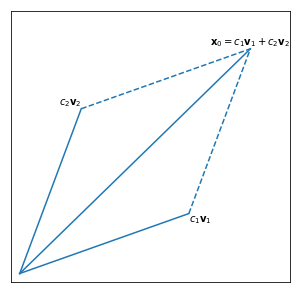

In [14]:
pi = np.pi

v_1 = np.array([np.cos(pi/9), np.sin(pi/9)])
v_2 = np.array([np.cos(pi/2 - pi/9), np.sin(pi/2 - pi/9)])

c_1 = 2
c_2 = 2

plt.figure(figsize=(5, 5))

plt.plot(np.array([0, c_1*v_1[0]]), np.array([0, c_1*v_1[1]]), c=c[0], linestyle=l[0])
plt.text(c_1*v_1[0], c_1*v_1[1], r'$c_1 \mathbf{v}_1$', horizontalalignment='left', verticalalignment='top')
plt.plot(np.array([0, c_2*v_2[0]]), np.array([0, c_2*v_2[1]]), c=c[0], linestyle=l[0])
plt.text(c_2*v_2[0], c_2*v_2[1], r'$c_2 \mathbf{v}_2$', horizontalalignment='right', verticalalignment='bottom')

plt.plot(np.array([c_1*v_1[0], c_1*v_1[0]+c_2*v_2[0]]), np.array([c_1*v_1[1], c_1*v_1[1]+c_2*v_2[1]]), c=c[0], linestyle=l[1])
plt.plot(np.array([c_2*v_2[0], c_1*v_1[0]+c_2*v_2[0]]), np.array([c_2*v_2[1], c_1*v_1[1]+c_2*v_2[1]]), c=c[0], linestyle=l[1])

plt.plot(np.array([0, c_1*v_1[0]+c_2*v_2[0]]), np.array([0, c_1*v_1[1]+c_2*v_2[1]]), c=c[0], linestyle=l[0])
plt.text(c_1*v_1[0]+c_2*v_2[0], c_1*v_1[1]+c_2*v_2[1], r'$\mathbf{x}_0 = c_1 \mathbf{v}_1 + c_2 \mathbf{v}_2$', horizontalalignment='center', verticalalignment='bottom')

plt.xlim(-0.1, 3)
plt.ylim(-0.1, 3)
plt.xticks([])
plt.yticks([])
# plt.grid(True)

plt.show()

### Example 5.2.1

Solve

$\begin{pmatrix}
\dot{x} \\
\dot{y}
\end{pmatrix} =
\begin{pmatrix}
1 & 1 \\
4 & -2
\end{pmatrix}
\begin{pmatrix}
x \\
y
\end{pmatrix}$


initial condition

$(x_0, y_0) = (2, -3)$

*Solution*:

$\tau = -1$, $\Delta = -6$

$\lambda^2 + \lambda - 6 = 0$

Hence 

$$\begin{align*}
\lambda_1 = 2, &\quad \lambda_2 = -3
\end{align*}$$

eigenvalue $\lambda$, eigenvector $\mathbf{v} = (v_1, v_2)$ satisfy

$$\begin{pmatrix}
1-\lambda & 1 \\
4 & -2 - \lambda
\end{pmatrix}
\begin{pmatrix}
v_1 \\
v_2
\end{pmatrix} =
\begin{pmatrix}
0 \\
0
\end{pmatrix}$$

$\lambda_1 = 2$, yield 

$$\begin{pmatrix}
-1 & 1 \\
4 & -4
\end{pmatrix}
\begin{pmatrix}
v_1 \\
v_2
\end{pmatrix} =
\begin{pmatrix}
0 \\
0
\end{pmatrix}$$


nontrivial solution:

$$\begin{pmatrix}
v_1 \\
v_2
\end{pmatrix} = 
\begin{pmatrix}
1 \\
1
\end{pmatrix}$$


$\lambda_2 = -3$, yield 

$$\begin{pmatrix}
4 & 1 \\
4 & 1
\end{pmatrix}
\begin{pmatrix}
v_1 \\
v_2
\end{pmatrix} =
\begin{pmatrix}
0 \\
0
\end{pmatrix}$$

nontrivial solution:

$$\begin{pmatrix}
v_1 \\
v_2
\end{pmatrix} = 
\begin{pmatrix}
1 \\
-4
\end{pmatrix}$$

In summary, 

$$\begin{align*}
\mathbf{v}_1 = 
\begin{pmatrix}
1 \\
1
\end{pmatrix}
, & \quad
\mathbf{v}_2 = 
\begin{pmatrix}
1 \\
-4
\end{pmatrix}
\end{align*}$$


$$\begin{align*}
\mathbf{x}(t)
= c_1 \begin{pmatrix}
1 \\
1
\end{pmatrix} e^{2t} 
+ c_2 \begin{pmatrix}
1 \\
-4
\end{pmatrix} e^{-3t}
& \quad\quad (5.2.7)
\end{align*}$$


$(x_0, y_0) = (2, -3)$

$$\begin{pmatrix}
2 \\
-3
\end{pmatrix} = c_1
\begin{pmatrix}
1 \\
1
\end{pmatrix} + c_2
\begin{pmatrix}
1 \\
-4
\end{pmatrix}$$

$$\begin{cases}
2 &= c_1 + c_2 \\
-3 &= c_1 - 4c_2
\end{cases}$$

$c_1 = 1, c_2 = 1$

(5.2.7) yields

$$\begin{cases}
x(t) &= e^{2t} + e^{-3t} \\
y(t) &= e^{2t} - 4e^{-3t}
\end{cases}$$

### Example 5.2.2

Draw the phase portrait for [Example 5.2.1](#Example-5.2.1)

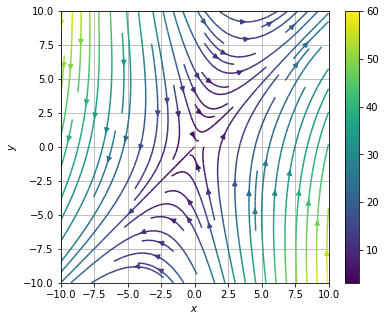

In [12]:
def x_dot(x, y):
    x_ = x + y
    return x_

def y_dot(x, y):
    y_ = 4*x - 2*y
    return y_

def speed(x, y):
    s = np.sqrt(x_dot(x, y)**2 + y_dot(x, y)**2)
    return s

x, y = np.linspace(-10, 10, 10), np.linspace(-10, 10, 10)
x, y = np.meshgrid(x, y)

plt.figure(figsize=(6, 5))

plt.streamplot(x, y, x_dot(x, y), y_dot(x, y), 
               density=1, 
               color=speed(x, y), 
               cmap='viridis')

plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar()

plt.savefig('img/fig_5_2_2.png', dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

plt.show()

### Example 5.2.3

for the case $\lambda_2 < \lambda_1 < 0$

*Sulution*:



**slow eigendirection**

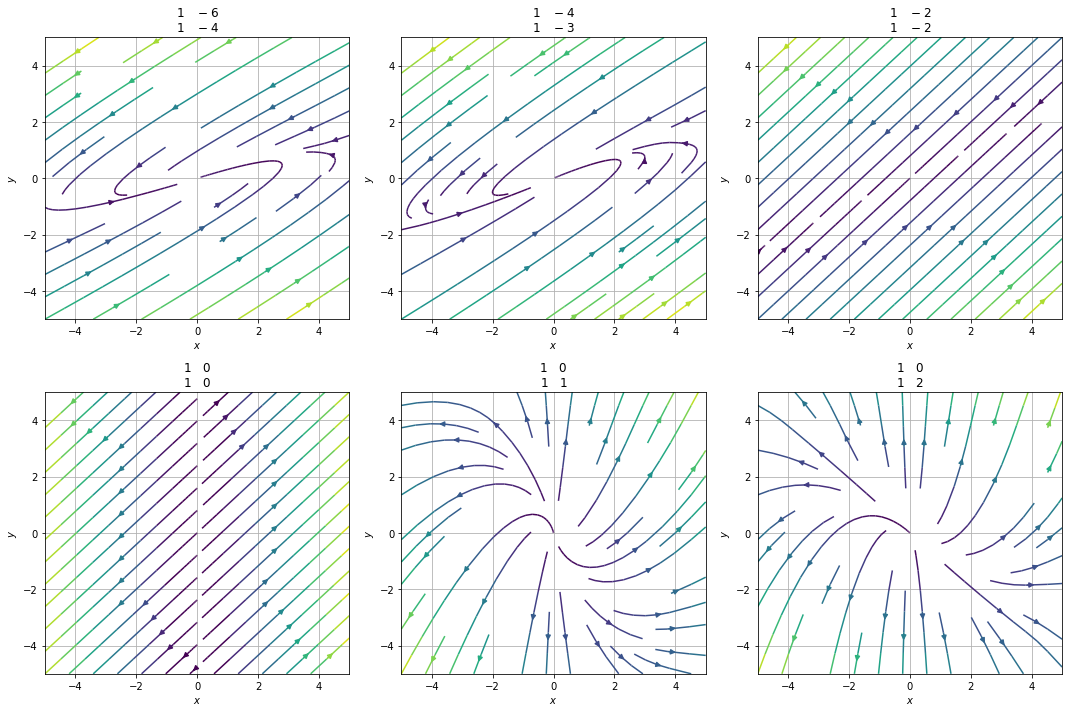

In [34]:
lambda_1s = np.array([-2, -1, -1, 0, 1, 1])
lambda_2s = np.array([-1, -1, 0, 1, 1, 2])

"""
a b
c d

a = 1
c = 1

1 + d = lambda_1 + lambda_2

ad - cb = lamba_1 * lambda_2


"""

def x_dot(x, y):
    x_ = a*x + b*y
    return x_

def y_dot(x, y):
    y_ = c*x + d*y
    return y_

def speed(x, y): 
    s = x_dot(x, y)**2 + y_dot(x, y)**2
    s = np.sqrt(s)
    return s

a = 1
c = 1

x, y = np.linspace(-5, 5, 10), np.linspace(-5, 5, 10)
x, y = np.meshgrid(x, y)

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

for ax, lambda_1, lambda_2 in zip(axes.ravel(), lambda_1s, lambda_2s):
    trace = lambda_1 + lambda_2
    delta = lambda_1 * lambda_2
    d = trace - 1
    b = d - delta
    
    ax.streamplot(x, y, x_dot(x, y), y_dot(x, y), 
                  color=speed(x, y), cmap='viridis', 
                  density=.5)
    ax.set(title=(r'$1 \quad %d$' '\n' r'$1 \quad %d$' % (b, d)))
    ax.grid(True)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')

plt.tight_layout()

plt.savefig('img/fig_5_2_3.png', dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

plt.show()

### Example 5.2.4

eigenvalues are complex number

*Solution*:

- center 
- spiral

eigenvalues:

$\lambda_{1,2} = \frac{1}{2}(\tau \pm \sqrt{\tau^2 - 4\Delta})$

complex eigenvalues, when

$\tau^2 - 4\Delta < 0$

write eigenvalues as 

$\lambda_{1, 2} = \alpha \pm i\omega$

where

$$\begin{align*}
\alpha = \frac{\tau}{2}, & \quad \omega = \frac{1}{2}\sqrt{4\Delta - \tau^2}
\end{align*}$$

$\mathbf{x}(t) = c_1 e^{\lambda_1 t} \mathbf{v}_1 + c_2 e^{\lambda_2 t} \mathbf{v}_2$

Euler's formula

$e^{i \omega t} = \cos \omega t + i \sin \omega t$

In [16]:
# lambda_1s = np.array([2, 1 + 1j])
# lambda_2s = np.array([1, 1 - 1j])

"""
a b
c d

a = 1
c = 1

1 + d = lambda_1 + lambda_2

ad - cb = lamba_1 * lambda_2


"""

def x_dot(x, y):
    x_ = a*x + b*y
    return x_

def y_dot(x, y):
    y_ = c*x + d*y
    return y_

def speed(x, y): 
    s = x_dot(x, y)**2 + y_dot(x, y)**2
    s = np.sqrt(s)
    return s

trace = np.array([])
delta = np.array([])

a = 1
c = 1

x, y = np.linspace(-5, 5, 10), np.linspace(-5, 5, 10)
x, y = np.meshgrid(x, y)

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

for ax, lambda_1, lambda_2 in zip(axes.ravel(), lambda_1s, lambda_2s):
    trace = lambda_1 + lambda_2
    delta = lambda_1 * lambda_2
    d = trace - 1
    b = d - delta
    
    ax.streamplot(x, y, x_dot(x, y), y_dot(x, y), 
                  color=speed(x, y), cmap='viridis')#, 
                  #density=.5)
    #ax.set(title=(r'$(\lambda_1, \lambda_2) = (%d, %d)$' % (lambda_1, lambda_2)))
    ax.grid(True)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')

plt.tight_layout()
plt.show()

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/streamplot.py:608: ComplexWarning: Casting complex values to real discards the imaginary part
  x = int(xi)
/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/streamplot.py:609: ComplexWarning: Casting complex values to real discards the imaginary part
  y = int(yi)
/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/streamplot.py:277: ComplexWarning: Casting complex values to real discards the imaginary part
  return (int((xi * self.x_grid2mask) + 0.5),
/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/streamplot.py:278: ComplexWarning: Casting complex values to real discards the imaginary part
  int((yi * self.y_grid2mask) + 0.5))
/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/streamplot.py:602: ComplexWarning: Casting complex values to real discards the imaginary par

TypeError: Cannot cast array data from dtype('complex128') to dtype('int64') according to the rule 'safe'

### Exmaple 5.2.5

eigenvalues equal

*Solution*:

suppose $\lambda_1 = \lambda_2 = \lambda$

- 2 independent eigenvector
- the same 

$\mathbf{x}_0 = c_1 \mathbf{v}_1 + c_2 \mathbf{v}_2$


$A \mathbf{x}_0 = A (c_1 \mathbf{v}_1 + c_2 \mathbf{v}_2) = c_1 \lambda \mathbf{v}_1 + c_2 \lambda \mathbf{v}_2 = \lambda \mathbf{x}_0$

$$A = \begin{pmatrix}
\lambda & 0 \\
0 & \lambda
\end{pmatrix}$$

if $\lambda \ne 0$,
all trajectories are straight line thrugh the origin $\mathbf{x}(t) = e^{\lambda t} \mathbf{x}_0$

**star node**


if 1 eigenvector, 

$$A = \begin{pmatrix}
\lambda & b \\
0 & \lambda
\end{pmatrix}$$


**degenerate node*



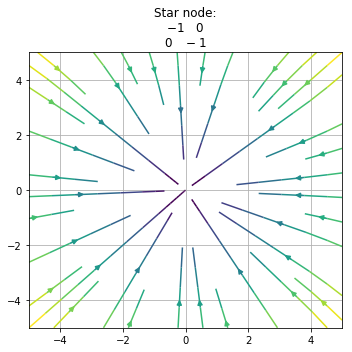

In [31]:
la = -1

def x_dot(x, y):
    x_ = la*x
    return x_

def y_dot(x, y):
    y_ = la*y
    return y_

def speed(x, y): 
    s = x_dot(x, y)**2 + y_dot(x, y)**2
    s = np.sqrt(s)
    return s

x, y = np.linspace(-5, 5, 10), np.linspace(-5, 5, 10)
x, y = np.meshgrid(x, y)

# fig, axes = plt.subplots(ncols=2, figsize=(10,5))
plt.figure(figsize=(5, 5))
figname = '5_2_5'

plt.streamplot(x, y, x_dot(x, y), y_dot(x, y), 
               color=speed(x, y), cmap='viridis', 
               density=.5)
plt.title('Star node:\n' r'$%d \quad 0$' '\n' r'$0 \quad %d$' % (la, la))
plt.grid(True)

plt.tight_layout()

plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

plt.show()

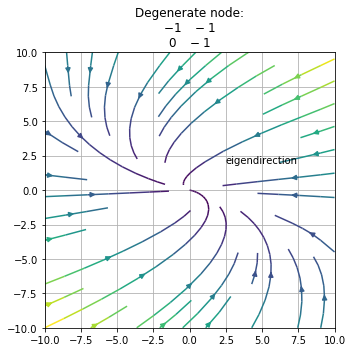

In [39]:
la = -1

bs = np.array([-3, 0])
b = - 1

def x_dot(x, y):
    x_ = la*x + b*y
    return x_

def y_dot(x, y):
    y_ = la*y
    return y_

def speed(x, y): 
    s = x_dot(x, y)**2 + y_dot(x, y)**2
    s = np.sqrt(s)
    return s

x, y = np.linspace(-10, 10, 10), np.linspace(-10, 10, 10)
x, y = np.meshgrid(x, y)

plt.figure(figsize=(5, 5))
figname = '5_2_6'


plt.streamplot(x, y, x_dot(x, y), y_dot(x, y), 
               color=speed(x, y), cmap='viridis', 
               density=.5)
text_x = 2.5
plt.text(text_x, text_x/(-b), 'eigendirection', horizontalalignment='left', verticalalignment='top')
plt.title('Degenerate node:\n' r'$%d \quad %d$' '\n' r'$0 \quad %d$' % (la, b, la))
plt.grid(True)
plt.tight_layout()

plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

plt.show()

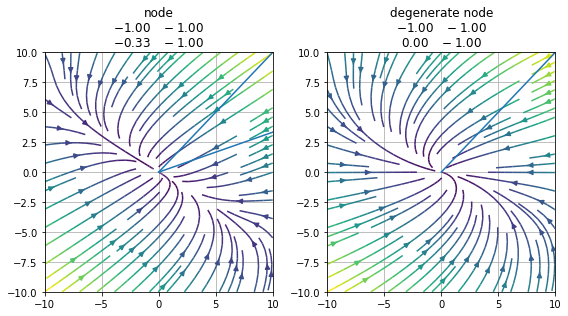

In [53]:
la = -1

bs = np.array([-3, 0])

As = np.array([[[-1, -1],
                [-1/3, -1]],
               [[-1, -1],
                [0, -1]]])

def x_dot(x, y):
    x_ = A[0,0]*x + A[0,1]*y
    return x_

def y_dot(x, y):
    y_ = A[1,0]*x + A[1,1]*y
    return y_

def speed(x, y): 
    s = x_dot(x, y)**2 + y_dot(x, y)**2
    s = np.sqrt(s)
    return s

x, y = np.linspace(-10, 10, 10), np.linspace(-10, 10, 10)
x, y = np.meshgrid(x, y)

fig, axes = plt.subplots(ncols=2, figsize=(8, 4.5))
figname = '5_2_7'

titles = np.array(['node', 'degenerate node'])

for ax, A, title in zip(axes, As, titles):
    ax.streamplot(x, y, x_dot(x, y), y_dot(x, y), 
                   color=speed(x, y), cmap='viridis', 
                   density=1)
    ax.set(title=('%s\n' r'$%.2f \quad %.2f$' '\n' r'$%.2f \quad %.2f$' % (title, A[0,0], A[0,1], A[1,0], A[1,1])))
    ax.grid(True)
    
axes[0].plot(np.array([0, 10]), np.array([0, 10]), c=c[0], linestyle=l[0])
axes[0].plot(np.array([0, 10]), np.array([0, 10/3]), c=c[0], linestyle=l[0])

axes[1].plot(np.array([0, 10]), np.array([0, 10]), c=c[0], linestyle=l[0])

plt.tight_layout()

plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

plt.show()

### Classification of Fixed Points

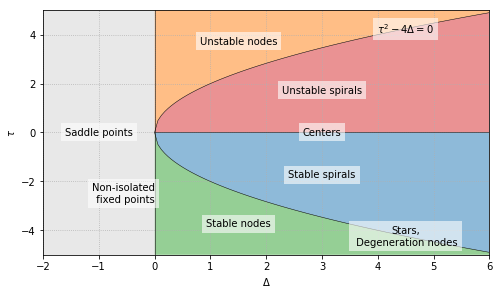

In [3]:
# delta 

def fp(delta):
    tau = np.sqrt(delta*4)
    return tau
def fn(delta):
    tau = -np.sqrt(delta*4)
    return tau

plt_x_min = -2
plt_x_max = 6
plt_y_min = -5
plt_y_max = 5

delta = np.linspace(0, plt_x_max, 100)

plt.figure(figsize=(8, 4.5))
figname='5_2_8'

plt.plot(delta, fp(delta), c='k', linestyle=l[0], linewidth=.5)
plt.plot(delta, fn(delta), c='k', linestyle=l[0], linewidth=.5)

plt.text(plt_x_max*3/4, fp(plt_x_max*3/4), r'$\tau^2 - 4\Delta = 0$', 
         horizontalalignment='center', verticalalignment='center', 
         bbox=dict(fc=(1, 1, 1, .6), ec='none'))

# fill
plt.fill_between(delta, np.repeat(plt_y_max, 100), fp(delta), facecolor=c[1], alpha=.5)
plt.text(plt_x_max/4, fp(plt_x_max/4)/2+plt_y_max/2, 'Unstable nodes', 
         horizontalalignment='center', verticalalignment='center', 
         bbox=dict(fc=(1, 1, 1, .6), ec='none'))

plt.fill_between(delta, fp(delta), np.repeat(0, 100), facecolor=c[3], alpha=.5)
plt.text(plt_x_max/2, fp(plt_x_max/2)/2, 'Unstable spirals', 
         horizontalalignment='center', verticalalignment='center', 
         bbox=dict(fc=(1, 1, 1, .6), ec='none'))

plt.plot(delta, np.repeat(0, len(delta)), c='k', linestyle=l[0], linewidth=.5)
plt.text(plt_x_max/2, 0, 'Centers', 
         horizontalalignment='center', verticalalignment='center', 
         bbox=dict(fc=(1, 1, 1, .6), ec='none'))

plt.fill_between(delta, np.repeat(0, 100), fn(delta), facecolor=c[0], alpha=.5)
plt.text(plt_x_max/2, fn(plt_x_max/2)/2, 'Stable spirals', 
         horizontalalignment='center', verticalalignment='center', 
         bbox=dict(fc=(1, 1, 1, .6), ec='none'))

plt.fill_between(delta, fn(delta), np.repeat(plt_y_min, 100), facecolor=c[2], alpha=.5)
plt.text(plt_x_max/4, fn(plt_x_max/4)/2+plt_y_min/2, 'Stable nodes', 
         horizontalalignment='center', verticalalignment='center', 
         bbox=dict(fc=(1, 1, 1, .6), ec='none'))

plt.text(plt_x_min/2, 0, 'Saddle points', 
         horizontalalignment='center', verticalalignment='center', 
         bbox=dict(fc=(1, 1, 1, .6), ec='none'))

plt.text(plt_x_max*3/4, fn(plt_x_max*3/4), 'Stars,\n Degeneration nodes', 
         horizontalalignment='center', verticalalignment='center', 
         bbox=dict(fc=(1, 1, 1, .6), ec='none'))
plt.axvspan(plt_x_min, 0, facecolor='lightgrey', alpha=.5)

plt.axvline(0, c='k', linestyle=l[0], linewidth=.5)
plt.text(0, plt_y_min/2, 'Non-isolated\n fixed points', 
         horizontalalignment='right', verticalalignment='center', 
         bbox=dict(fc=(1, 1, 1, .6), ec='none'))

plt.xlim(plt_x_min, plt_x_max)
plt.ylim(plt_y_min, plt_y_max)
plt.grid(True, linestyle=l[3])
plt.xlabel(r'$\Delta$')
plt.ylabel(r'$\tau$')


plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)
plt.show()

$$\begin{align*}
\lambda_{1,2} = \frac{1}{2} (\tau \pm \sqrt{\tau^2 - 4\Delta}), &\quad
\Delta = \lambda_1 \lambda_2, &\quad
\tau = \lambda_1 + \lambda_2
\end{align*}$$

$(\lambda - \lambda_1)(\lambda - \lambda_2) = \lambda^2 - \tau\lambda + \Delta = 0$



### Example 5.2.6

Classify the fixed points $\mathbf{x}^* = \mathbf{Ax}$

$$A = \begin{pmatrix}
1 & 2 \\
3 & 4
\end{pmatrix}$$

*Solution*:

$\Delta = -2$, fixed point is saddle point

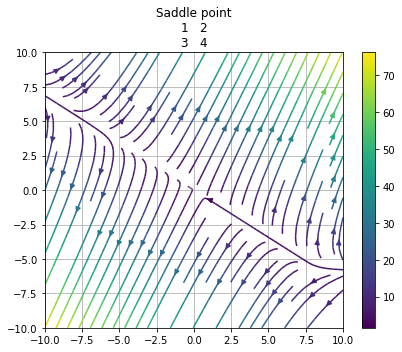

In [15]:
A = np.array([[1, 2],
              [3, 4]])

def x_dot(x, y, A):
    x_ = A[0,0]*x + A[0,1]*y
    return x_

def y_dot(x, y, A):
    y_ = A[1,0]*x + A[1,1]*y
    return y_

def speed(x, y, A): 
    s = x_dot(x, y, A)**2 + y_dot(x, y, A)**2
    s = np.sqrt(s)
    return s

x, y = np.linspace(-10, 10, 10), np.linspace(-10, 10, 10)
x, y = np.meshgrid(x, y)

title = 'Saddle point'

plt.figure(figsize=(6, 5))
figname = '5_2_'

plt.streamplot(x, y, x_dot(x, y, A), y_dot(x, y, A), 
               color=speed(x, y, A), cmap='viridis', 
               density=1)
plt.title('%s\n' r'$%d \quad %d$' '\n' r'$%d \quad %d$' % (title, A[0,0], A[0,1], A[1,0], A[1,1]))
plt.grid(True)
plt.colorbar()

plt.tight_layout()

# plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
#             orientation='portrait', papertype=None, format='png',
#             transparent=False, bbox_inches=None, pad_inches=0.1,
#             frameon=None)

plt.show()

### Example 5.2.7

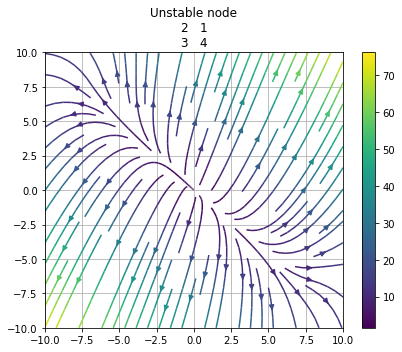

In [17]:
A = np.array([[2, 1],
              [3, 4]])

def x_dot(x, y, A):
    x_ = A[0,0]*x + A[0,1]*y
    return x_

def y_dot(x, y, A):
    y_ = A[1,0]*x + A[1,1]*y
    return y_

def speed(x, y, A): 
    s = x_dot(x, y, A)**2 + y_dot(x, y, A)**2
    s = np.sqrt(s)
    return s

x, y = np.linspace(-10, 10, 10), np.linspace(-10, 10, 10)
x, y = np.meshgrid(x, y)

title = 'Unstable node'

plt.figure(figsize=(6, 5))
figname = '5_2_'

plt.streamplot(x, y, x_dot(x, y, A), y_dot(x, y, A), 
               color=speed(x, y, A), cmap='viridis', 
               density=1)
plt.title('%s\n' r'$%d \quad %d$' '\n' r'$%d \quad %d$' % (title, A[0,0], A[0,1], A[1,0], A[1,1]))
plt.grid(True)
plt.colorbar()

plt.tight_layout()

# plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
#             orientation='portrait', papertype=None, format='png',
#             transparent=False, bbox_inches=None, pad_inches=0.1,
#             frameon=None)

plt.show()

## 5.3 Love Affairs

[Strogatz, S. H. (1988). Love affairs and differential equations. Mathematics Magazine, 61(1), 35.](http://ai.stanford.edu/~rajatr/articles/SS_love_dEq.pdf)

Let

$$\begin{cases}
R(t) = \text{Romeo's love} \quad / \quad \text{hate for Juliet at time } t \\
J(t) = \text{Juliet's love} \quad / \quad \text{hate for Romeo at time } t
\end{cases}$$

$$\begin{align*}
\dot{R} = aJ \\
\dot{J} = -bR
\end{align*}$$



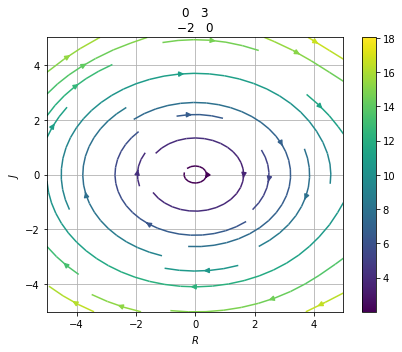

In [27]:
A = np.array([[0, 3],
              [-2, 0]])


def R_dot(R, J, A):
    R_ = A[0,0]*R + A[0,1]*J
    return R_

def J_dot(R, J, A):
    J_ = A[1,0]*R + A[1,1]*J
    return J_

def speed(R, J, A):
    s = R_dot(R, J, A)**2 + J_dot(R, J, A)**2
    s = np.sqrt(s)
    return s

R, J = np.linspace(-5, 5, 10), np.linspace(-5, 5, 10)
R, J = np.meshgrid(R, J)

plt.figure(figsize=(6, 5))
figname = '5_3_1'
    
plt.streamplot(R, J, R_dot(R, J, A), J_dot(R, J, A), 
              density=.5, 
              color=speed(R, J, A), cmap='viridis')#, 
              #start_points=start)
    
plt.title((r'$%d \quad %d$' '\n' r'$%d \quad %d$' % (A[0,0], A[0,1], A[1,0], A[1,1])))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel(r'$R$')
plt.ylabel(r'$J$')
plt.grid(True)
plt.colorbar()
    
plt.tight_layout()

plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

plt.show()

### Example 5.3.1

$$\begin{pmatrix}
\dot{R} \\
\dot{J}
\end{pmatrix} =
\begin{pmatrix}
a & b \\
b & a
\end{pmatrix}
\begin{pmatrix}
R \\
J
\end{pmatrix}$$

$$\mathbf{A} = \begin{pmatrix}
a & b \\
b & a
\end{pmatrix}$$



In [33]:
A = np.array([[1,2], [3,4]])

print('trace = %.1f \n det = %.1f' % (np.trace(A), np.linalg.det(A)))

trace = 5.0 
 det = -2.0


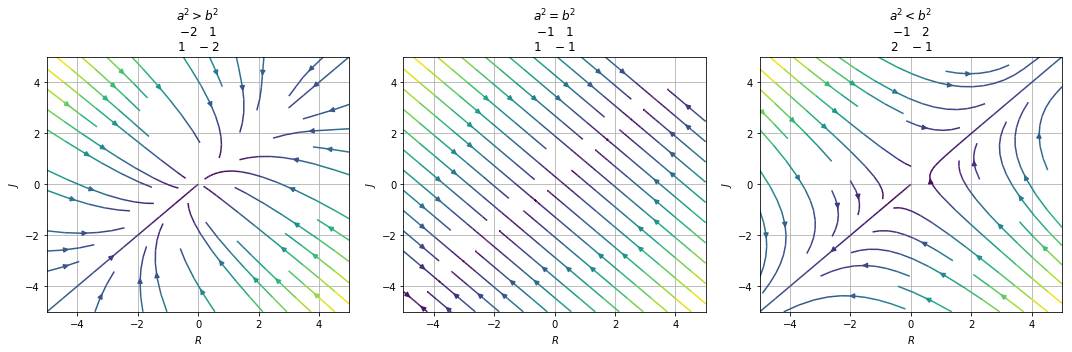

In [42]:
aa, bb = np.array([-2, -1, -1]), np.array([1, 1, 2])

def R_dot(R, J, A):
    R_ = A[0,0]*R + A[0,1]*J
    return R_

def J_dot(R, J, A):
    J_ = A[1,0]*R + A[1,1]*J
    return J_

def speed(R, J, A):
    s = R_dot(R, J, A)**2 + J_dot(R, J, A)**2
    s = np.sqrt(s)
    return s

R, J = np.linspace(-5, 5, 10), np.linspace(-5, 5, 10)
R, J = np.meshgrid(R, J)

titles = np.array([r'$a^2 > b^2$', r'$a^2 = b^2$', r'$a^2 < b^2$'])

fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

figname = '5_3_2'

for ax, a, b in zip(axes, aa, bb):
    
    A = np.array([[a, b],
                  [b, a]])
    
    ax.streamplot(R, J, R_dot(R, J, A), J_dot(R, J, A), 
                  density=.5, 
                  color=speed(R, J, A), cmap='viridis')#, 
                  #start_points=start)
    
    if a**2 > b**2:
        ax.set(xlabel=r'$R$', ylabel=r'$J$')
        ax.set(title=('%s\n' r'$%d \quad %d$' '\n' r'$%d \quad %d$' % (titles[0], A[0,0], A[0,1], A[1,0], A[1,1])))
    elif a**2 == b**2:
        ax.set(xlabel=r'$R$', ylabel=r'$J$')
        ax.set(title=('%s\n' r'$%d \quad %d$' '\n' r'$%d \quad %d$' % (titles[1], A[0,0], A[0,1], A[1,0], A[1,1])))
    elif a**2 < b**2:
        ax.set(xlabel=r'$R$', ylabel=r'$J$')
        ax.set(title=('%s\n' r'$%d \quad %d$' '\n' r'$%d \quad %d$' % (titles[2], A[0,0], A[0,1], A[1,0], A[1,1])))
    
    
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel(r'$R$')
    ax.set_ylabel(r'$J$')
    ax.grid(True)
     
plt.tight_layout()

plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

plt.show()

---
*Overview*

- [5.0 Introduction](#5.0-Introduction)
- [5.1 Definitions and Exmaples](#5.1 Definitions-and-Exmaples)
    - [Example 5.1.1](#Example-5.1.1)
    - [Stability Language](#Stability-Language)
- [5.2 Classification of Linear Systems](#5.2-Classification-of-Linear-Systems)
    - [Example 5.2.1](#Example-5.2.1)
    - [Example 5.2.2](#Example-5.2.2)
    - [Classification of Fixed Points](#Classification-of-Fixed-Points)
    - [Example 5.2.6](#Example-5.2.6)
    - [Example 5.2.7](#Example-5.2.7)
- [5.3 Love Affairs](#5.3-Love-Affairs)
    - [Example 5.3.1](#Example-5.3.1)